<a href="https://colab.research.google.com/github/wajihawajid/Fake-News-Detection-using-Deep-Learning/blob/main/Fake_News_on_Covid_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sklearn
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout, GRU
from keras.layers import GlobalMaxPooling1D, Conv1D

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [158]:
from google.colab import files
covid1 = files.upload()

Saving covid_1.csv to covid_1 (1).csv


In [159]:
from google.colab import files
covid2 = files.upload()

Saving covid_2.csv to covid_2 (1).csv


In [160]:
from google.colab import files
covid3 = files.upload()

Saving covid_3.csv to covid_3 (1).csv


In [161]:
from google.colab import files
covid4 = files.upload()

Saving covid_4.csv to covid_4 (1).csv


In [162]:
from google.colab import files
covid5 = files.upload()

Saving covid_5.csv to covid_5 (1).csv


In [163]:
from google.colab import files
covid6 = files.upload()

Saving covid_6.csv to covid_6 (1).csv


In [164]:
from google.colab import files
covid7 = files.upload()

Saving covid_7.csv to covid_7 (1).csv


## **Read Dataset files**

In [ ]:
covid1 = pd.read_csv('covid_1.csv',encoding = 'unicode_escape')
a=covid1[['title','Label']]
a

In [ ]:
covid2 = pd.read_csv('covid_2.csv',encoding = 'unicode_escape')
b=covid2[['title','Label']]
b

In [ ]:
covid3 = pd.read_csv('covid_3.csv',encoding = 'unicode_escape')
c=covid3[['title','Label']]
c

In [ ]:
covid4 = pd.read_csv('covid_4.csv',encoding = 'unicode_escape')
d=covid4[['title','Label']]
d

In [ ]:
covid5 = pd.read_csv('covid_5.csv',encoding = 'unicode_escape')
e=covid5[['title','Label']]
e

In [ ]:
covid6 = pd.read_csv('covid_6.csv',encoding = 'unicode_escape')
f=covid6[['title','Label']]
f

In [171]:
covid7 = pd.read_csv('covid_7.csv',encoding = 'unicode_escape')
g=covid7[['title','Label']]
i=g['Label']
g=g.dropna()


In [172]:
g['Label']=g['Label'].astype('int')

In [ ]:
g

## **Merge Dataset**

In [173]:
data= a.append(b).append(c).append(d).append(e).append(f).append(g)

In [ ]:
data

## **Shuffle data**

In [174]:
import sklearn
data = sklearn.utils.shuffle(data)

## **Data Cleaning**

## **Removing NonEnglish words and lower casing**

In [ ]:
data['title']=data['title'].str.replace('[^A-z ]','').str.strip()

In [ ]:
data['title']=data['title'].str.lower().str.split()

In [ ]:
data

## **Stop Words Removing**

In [ ]:
text = data['title']
label = data['Label']
stop_words = list(stopwords.words('english')) 
filterd_data = []
for words in text:
  if words not in stop_words:
    filterd_data.append(words)

## **Vectorization**

In [ ]:
max_len = 150
max_features = 4000

In [ ]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(filterd_data)
sequence = tokenizer.texts_to_sequences(filterd_data)
ready_data = pad_sequences(sequence, maxlen = max_len)

## **Split Data into Test, Train and Validation data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ready_data, data.Label,test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.25,random_state=1)

## **LSTM MODEL**

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 4))
model_lstm.add(LSTM(4))
model_lstm.add(Dense(1, activation = 'sigmoid'))
model_lstm.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
lstm = model_lstm.fit(X_train,y_train, epochs = 10, batch_size=10 ,validation_data= (X_val, y_val))

Epoch 1/10
196/196 [==============================] - 15s 64ms/step - loss: 0.6268 - acc: 0.7382 - val_loss: 0.5400 - val_acc: 0.7274
Epoch 2/10
196/196 [==============================] - 12s 61ms/step - loss: 0.4866 - acc: 0.7615 - val_loss: 0.4233 - val_acc: 0.8147
Epoch 3/10
196/196 [==============================] - 12s 63ms/step - loss: 0.3650 - acc: 0.8679 - val_loss: 0.3321 - val_acc: 0.8836
Epoch 4/10
196/196 [==============================] - 12s 63ms/step - loss: 0.2853 - acc: 0.9063 - val_loss: 0.2722 - val_acc: 0.9127
Epoch 5/10
196/196 [==============================] - 12s 63ms/step - loss: 0.2357 - acc: 0.9407 - val_loss: 0.2448 - val_acc: 0.9204
Epoch 6/10
196/196 [==============================] - 12s 63ms/step - loss: 0.2064 - acc: 0.9442 - val_loss: 0.2333 - val_acc: 0.9188
Epoch 7/10
196/196 [==============================] - 12s 63ms/step - loss: 0.1737 - acc: 0.9421 - val_loss: 0.2060 - val_acc: 0.9326
Epoch 8/10
196/196 [==============================] - 12s 62ms

In [ ]:
model_lstm.evaluate(X_test,y_test)

21/21 [==============================] - 0s 8ms/step - loss: 0.2109 - acc: 0.9219


[0.21091817319393158, 0.9218989014625549]

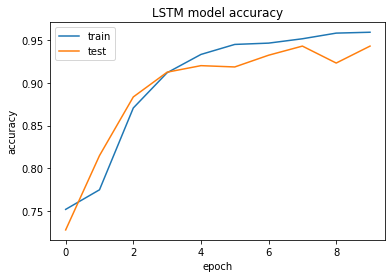

In [ ]:
plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
lstm_pred=model_lstm.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,lstm_pred)

0.9472595656670113

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,lstm_pred)

0.9581589958158996

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,lstm_pred)

0.9366053169734151

## **Creating bidirectional LSTM Model**

In [ ]:
model_bi=Sequential()
model_bi.add(Embedding(max_features, 4))
model_bi.add(Bidirectional(LSTM(4)))
model_bi.add(Dropout(0.4))
model_bi.add(Dense(1,activation='sigmoid'))
model_bi.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bi =model_bi.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=10)


Epoch 1/10
196/196 [==============================] - 19s 79ms/step - loss: 0.6252 - accuracy: 0.7488 - val_loss: 0.5338 - val_accuracy: 0.7320
Epoch 2/10
196/196 [==============================] - 15s 74ms/step - loss: 0.4914 - accuracy: 0.7524 - val_loss: 0.4176 - val_accuracy: 0.8193
Epoch 3/10
196/196 [==============================] - 15s 76ms/step - loss: 0.3613 - accuracy: 0.8331 - val_loss: 0.3167 - val_accuracy: 0.8668
Epoch 4/10
196/196 [==============================] - 15s 75ms/step - loss: 0.2896 - accuracy: 0.8957 - val_loss: 0.2758 - val_accuracy: 0.9035
Epoch 5/10
196/196 [==============================] - 15s 74ms/step - loss: 0.2226 - accuracy: 0.9296 - val_loss: 0.2415 - val_accuracy: 0.9250
Epoch 6/10
196/196 [==============================] - 15s 74ms/step - loss: 0.1927 - accuracy: 0.9386 - val_loss: 0.2176 - val_accuracy: 0.9280
Epoch 7/10
196/196 [==============================] - 14s 74ms/step - loss: 0.1518 - accuracy: 0.9514 - val_loss: 0.2059 - val_accuracy:

In [ ]:
model_bi.evaluate(X_test,y_test)

21/21 [==============================] - 0s 13ms/step - loss: 0.2188 - accuracy: 0.9311


[0.2188139110803604, 0.93108731508255]

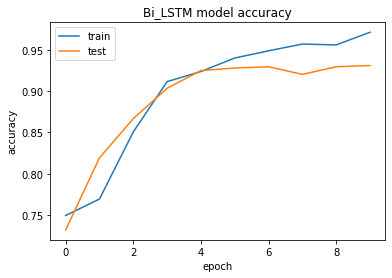

In [ ]:
plt.plot(bi.history['accuracy'])
plt.plot(bi.history['val_accuracy'])
plt.title('Bi_LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
bi_lstm_pred=model_bi.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,bi_lstm_pred)

0.9533678756476685

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,bi_lstm_pred)


0.9310872894333844

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,bi_lstm_pred)

0.944558521560575

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,bi_lstm_pred)

0.9623430962343096

## **CNN Model**

In [ ]:
 from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D
model_cnn=Sequential()
model_cnn.add(Embedding(max_features, 4))
model_cnn.add(Conv1D(128, 8, activation='relu')),
model_cnn.add(GlobalMaxPooling1D()),
model_cnn.add(Dense(1,activation='sigmoid')),
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn = model_cnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=10)

Epoch 1/10
196/196 [==============================] - 2s 8ms/step - loss: 0.5982 - accuracy: 0.7431 - val_loss: 0.4052 - val_accuracy: 0.8239
Epoch 2/10
196/196 [==============================] - 1s 7ms/step - loss: 0.3017 - accuracy: 0.8986 - val_loss: 0.2327 - val_accuracy: 0.9112
Epoch 3/10
196/196 [==============================] - 1s 7ms/step - loss: 0.1385 - accuracy: 0.9574 - val_loss: 0.2004 - val_accuracy: 0.9280
Epoch 4/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0758 - accuracy: 0.9841 - val_loss: 0.2094 - val_accuracy: 0.9142
Epoch 5/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0516 - accuracy: 0.9873 - val_loss: 0.2107 - val_accuracy: 0.9173
Epoch 6/10
196/196 [==============================] - 1s 6ms/step - loss: 0.0257 - accuracy: 0.9947 - val_loss: 0.2101 - val_accuracy: 0.9188
Epoch 7/10
196/196 [==============================] - 1s 7ms/step - loss: 0.0211 - accuracy: 0.9954 - val_loss: 0.2570 - val_accuracy: 0.9066
Epoch 

In [ ]:
model_cnn.evaluate(X_test,y_test)

21/21 [==============================] - 0s 4ms/step - loss: 0.2414 - accuracy: 0.9280


[0.24135130643844604, 0.9280245304107666]

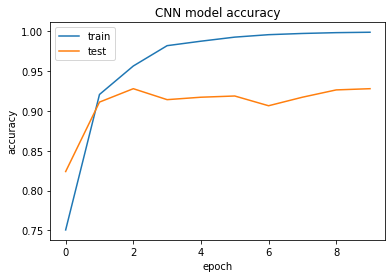

In [ ]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cnn_pred=model_cnn.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,cnn_pred)

0.9516957862281604

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,cnn_pred)

0.9353535353535354

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,cnn_pred)

0.9686192468619247

## **GRU Network**

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 4))
model_gru.add(GRU(8))
model_gru.add(Dense(1, activation = 'sigmoid'))
model_gru.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
gru = model_gru.fit(X_train,y_train, epochs = 10, batch_size=10 ,validation_data= (X_val, y_val))

Epoch 1/10
196/196 [==============================] - 15s 66ms/step - loss: 0.6215 - acc: 0.7325 - val_loss: 0.5334 - val_acc: 0.7427
Epoch 2/10
196/196 [==============================] - 13s 66ms/step - loss: 0.4916 - acc: 0.7485 - val_loss: 0.4121 - val_acc: 0.8086
Epoch 3/10
196/196 [==============================] - 13s 67ms/step - loss: 0.3204 - acc: 0.8634 - val_loss: 0.3256 - val_acc: 0.8652
Epoch 4/10
196/196 [==============================] - 13s 66ms/step - loss: 0.2587 - acc: 0.9112 - val_loss: 0.2791 - val_acc: 0.8882
Epoch 5/10
196/196 [==============================] - 13s 67ms/step - loss: 0.1743 - acc: 0.9389 - val_loss: 0.2679 - val_acc: 0.8959
Epoch 6/10
196/196 [==============================] - 13s 68ms/step - loss: 0.1568 - acc: 0.9437 - val_loss: 0.2621 - val_acc: 0.9112
Epoch 7/10
196/196 [==============================] - 13s 67ms/step - loss: 0.1436 - acc: 0.9446 - val_loss: 0.2221 - val_acc: 0.9188
Epoch 8/10
196/196 [==============================] - 13s 67ms

In [ ]:
model_gru.evaluate(X_test,y_test)

21/21 [==============================] - 0s 9ms/step - loss: 0.1944 - acc: 0.9219


[0.19440627098083496, 0.9218989014625549]

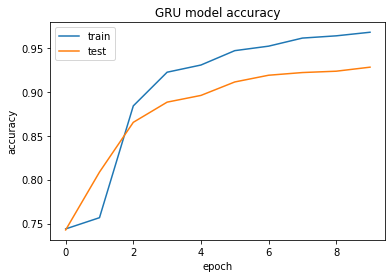

In [ ]:
plt.plot(gru.history['acc'])
plt.plot(gru.history['val_acc'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
gru_pred=model_gru.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,gru_pred)

0.9482233502538071

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,gru_pred)

0.9211045364891519

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,gru_pred)

0.9769874476987448